<a href="https://colab.research.google.com/github/Kaustubh-D-Karkhanis/Plant-disease-detector/blob/main/MiniProject_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pwd

/content


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import matplotlib.image as mpimg
import random
from sklearn import preprocessing
import tensorflow.keras as keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [28]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 7
EPOCHS = 29
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

In [29]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 5,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [30]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Custom_db/train/',  
        target_size = (256, 256),  
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="rgb")
validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/Custom_db/val',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb")
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Custom_db/test',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode = "rgb"
)

Found 1734 images belonging to 7 classes.
Found 1120 images belonging to 7 classes.
Found 1341 images belonging to 7 classes.


In [32]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 64)       

In [34]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,   
    epochs = EPOCHS,
    validation_data = validation_generator,
    validation_steps = validation_generator.n // validation_generator.batch_size
)

Epoch 1/29
108/108 [==============================] - 378s 4s/step - loss: 0.2779 - accuracy: 0.8888 - val_loss: 0.2893 - val_accuracy: 0.8938
Epoch 2/29
108/108 [==============================] - 340s 3s/step - loss: 0.3090 - accuracy: 0.8696 - val_loss: 0.4353 - val_accuracy: 0.8420
Epoch 3/29
108/108 [==============================] - 376s 3s/step - loss: 0.2614 - accuracy: 0.8888 - val_loss: 0.4257 - val_accuracy: 0.8384
Epoch 4/29
108/108 [==============================] - 373s 3s/step - loss: 0.2831 - accuracy: 0.8917 - val_loss: 0.2832 - val_accuracy: 0.8893
Epoch 5/29
108/108 [==============================] - 340s 3s/step - loss: 0.2792 - accuracy: 0.8935 - val_loss: 0.2791 - val_accuracy: 0.8982
Epoch 6/29
108/108 [==============================] - 377s 3s/step - loss: 0.2497 - accuracy: 0.9010 - val_loss: 0.2328 - val_accuracy: 0.9179
Epoch 7/29
108/108 [==============================] - 341s 3s/step - loss: 0.2308 - accuracy: 0.9075 - val_loss: 0.3187 - val_accuracy: 0.8607

In [37]:
model.save('50epochs_maize_potato2.h5')

In [38]:
score = model.evaluate_generator(test_generator)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

<ipython-input-38-82e12196d124>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss :  0.19726312160491943
Test accuracy :  0.9299030303955078


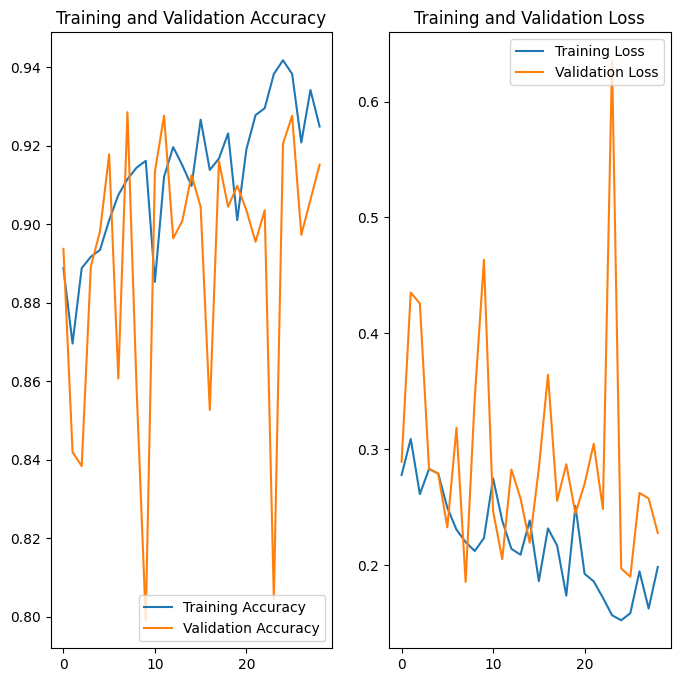

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as pl

In [ ]:
img_path = "/content/drive/MyDrive/Custom_db/test/Gray_leaf_spot/Corn_Gray_Spot (426).JPG"

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [ ]:
img_preprocessed = preprocess_input(img_batch)

In [ ]:
prediction = model.predict(img_preprocessed)

In [ ]:
print(prediction)